# Assignment Data Sets - Week Three - Part 2- 

## Team Members

*Simon Ustoyev

*Elina Azrilyan

*Jack Russo

*Anil Akyildirim

## Introduction

In this assignment, we are given a simple 2-node network which has the attendance of 18 Southern Women at 14 social events. The goal of the assignment is create a graph object with the network data, provide basic analysis and see if we can make certain inference about the relationship between the women and the social events.

## About the Data Set

The details of the data set can be found here: ( http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis ). It is an 18x14 matrix (Women X Social Event). 1 if the person attended the social event, 0 if they didnt. The network data set can be found here: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat 

The instructions on creating the data set can be found here: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html 


In [4]:
# Load Libraries
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

## Data Collection

Based on the instruction on creating dataset, we can use davis_southern_women_graph() to create the graph object.

In [5]:
# create G graph object
G = nx.davis_southern_women_graph()

In [6]:
G

In [7]:
# we have Women and Social Events (reference the instructions to get the women and clubs)
women = G.graph['top']
clubs = G.graph['bottom']

In [8]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [9]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [10]:
# following instructions on creating the Biadjacency Matrix
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


## Data Exploration

We have our nodes (2 types of node and edges), we can further draw our graph with node labels being social events (E1, E2 and etc..) and women.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


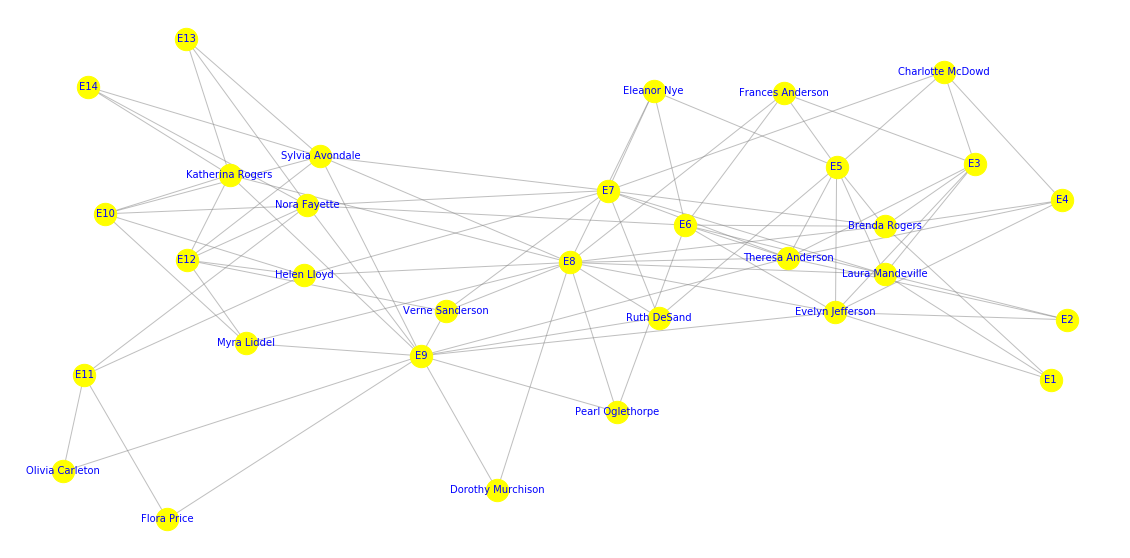

In [11]:
# reference https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
plt.figure(figsize=(20,10))
pos=nx.spring_layout(G,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(G, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="Yellow", node_size=500)
plt.axis("off")
plt.show()

In [12]:
#basic insight for # of clubs each woman is member of
d=nx.degree(G)
d

DegreeView({'Evelyn Jefferson': 8, 'Laura Mandeville': 7, 'Theresa Anderson': 8, 'Brenda Rogers': 7, 'Charlotte McDowd': 4, 'Frances Anderson': 4, 'Eleanor Nye': 4, 'Pearl Oglethorpe': 3, 'Ruth DeSand': 4, 'Verne Sanderson': 4, 'Myra Liddel': 4, 'Katherina Rogers': 6, 'Sylvia Avondale': 7, 'Nora Fayette': 8, 'Helen Lloyd': 5, 'Dorothy Murchison': 2, 'Olivia Carleton': 2, 'Flora Price': 2, 'E1': 3, 'E2': 3, 'E3': 6, 'E4': 4, 'E5': 8, 'E6': 8, 'E7': 10, 'E8': 14, 'E9': 12, 'E10': 5, 'E11': 4, 'E12': 6, 'E13': 3, 'E14': 3})

In [13]:
# following instructions on assigning biparrite graph to the women nodes
# project bipartite graph onto women nodes
W_1 = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W_1.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


Based on the above we can see that Evelyn Jefferson attended 17 events, Laura Mandeville attended 15 events, Theresa Anderson attended 17 events and so on... By using bipartite.projected_graph(G, women) , we received an output of the graph object W_1 that is the projection of the bipartite graph G on the specified (all the nodes in this case) nodes. These nodes retain their attributes and are connected to W_1 if they have a common neighbour in G. Reference: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.bipartite.projection.projected_graph.html . In our case the women are connected if they go to the same social events. 

In [14]:
# following instructions on assigning biparrite graph to the women nodes
# project bipartite graph onto women nodes
W_2 = bipartite.projected_graph(G, clubs)
print('')
print("#Friends, Clubs")
for w in clubs:
    print('%d %s' % (W_2.degree(w), w))


#Friends, Clubs
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


By looking at above, we can see that 8 women went to E1 event, 13 women went to E6 event.

Let's create a graph with graph object W_1 and W_2 (bipartite projected graph)

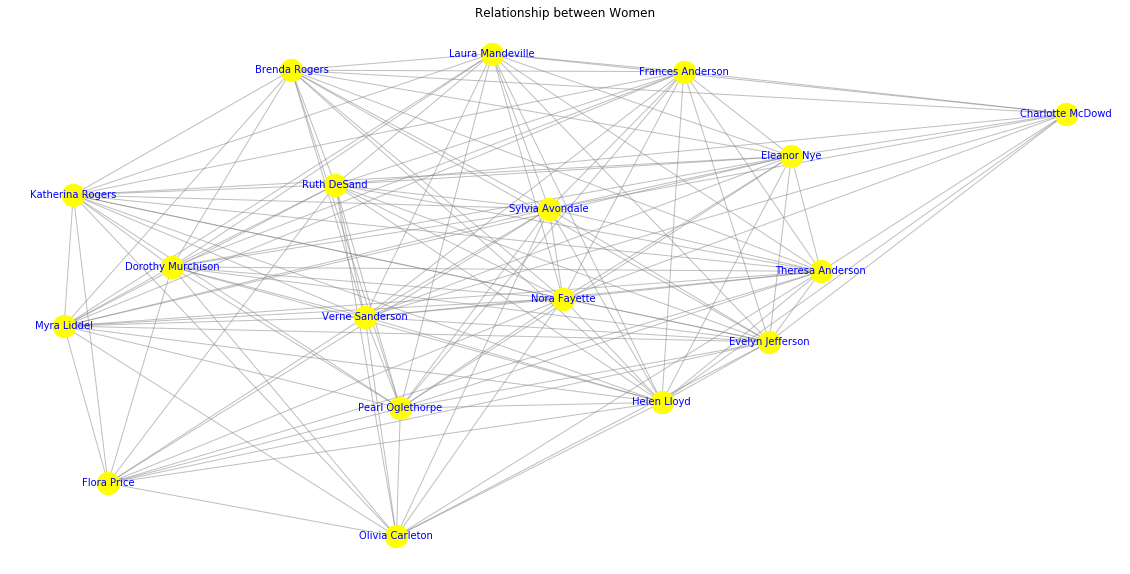

In [15]:
#reference https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
plt.figure(figsize=(20,10))
pos=nx.spring_layout(W_1,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(W_1, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(W_1, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(W_1, pos, node_color="Yellow", node_size=500)
plt.axis("off")
plt.title("Relationship between Women")
plt.show()

With this graph, we are able to visualize the relationship of each women. For example, Olivia Carleton is friends with Fiora Price and also she is friends with Pearl Oglethorpe who is also friends with Fiora Price. 

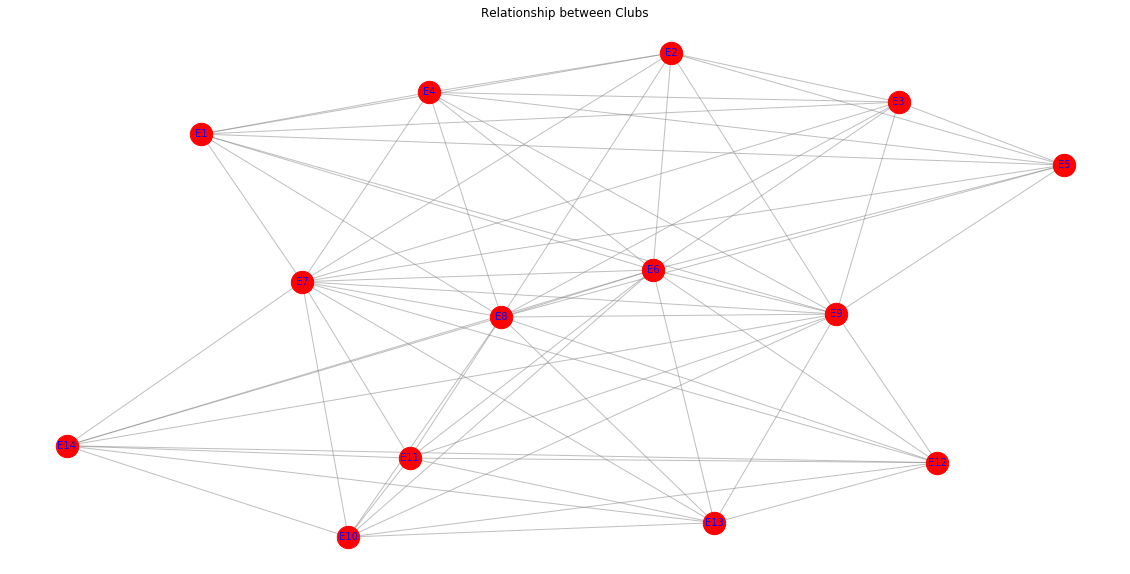

In [16]:
#reference https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
plt.figure(figsize=(20,10))
pos=nx.spring_layout(W_2,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(W_2, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(W_2, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(W_2, pos, node_color="Red", node_size=500)
plt.axis("off")
plt.title("Relationship between Clubs")
plt.show()

With the above graph we can see E8 and E6 are at the center with most connected to the other events.

We can also look at the weighted projection of initial G graph object we created. 

In [17]:
# following further instructions for weighted projection
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W_3 = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W_3.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


By using weighted_projected_graph, we are getting an output of W_3 with weighted projection of graph G on one of its node sets. 
https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.bipartite.projection.weighted_projected_graph.html
Similar to what we have done earlier, we are going to do one for women node and one for clubs(social events)

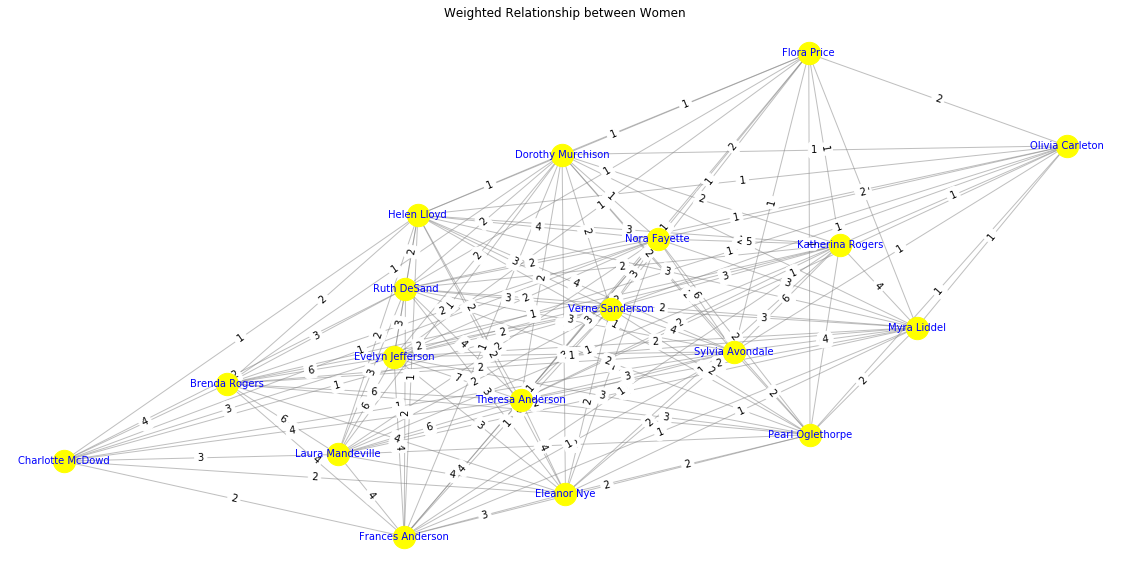

In [18]:
#reference https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
#https://stackoverflow.com/questions/28372127/add-edge-weights-to-plot-output-in-networkx
plt.figure(figsize=(20,10))
labels = nx.get_edge_attributes(W_3,'weight')
pos=nx.spring_layout(W_3,k=None, iterations=80)
pos_labels={}
keys=pos.keys()
for key in keys:
    x,y=pos[key]
    pos_labels[key]=(x,y)
nx.draw_networkx_labels(W_3, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(W_3, pos, edge_color="Gray", alpha=0.5)
nx.draw_networkx_nodes(W_3, pos, node_color="Yellow", node_size=500)
nx.draw_networkx_edge_labels(W_3,pos,edge_labels=labels)
plt.axis("off")
plt.title("Weighted Relationship between Women")
plt.show()

We added the weights of edges to the our plot, however, even though it gives us the weight attribute information, it is hard to read as part of the visualization. We can enhance on this and replot using weight as part of a color.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


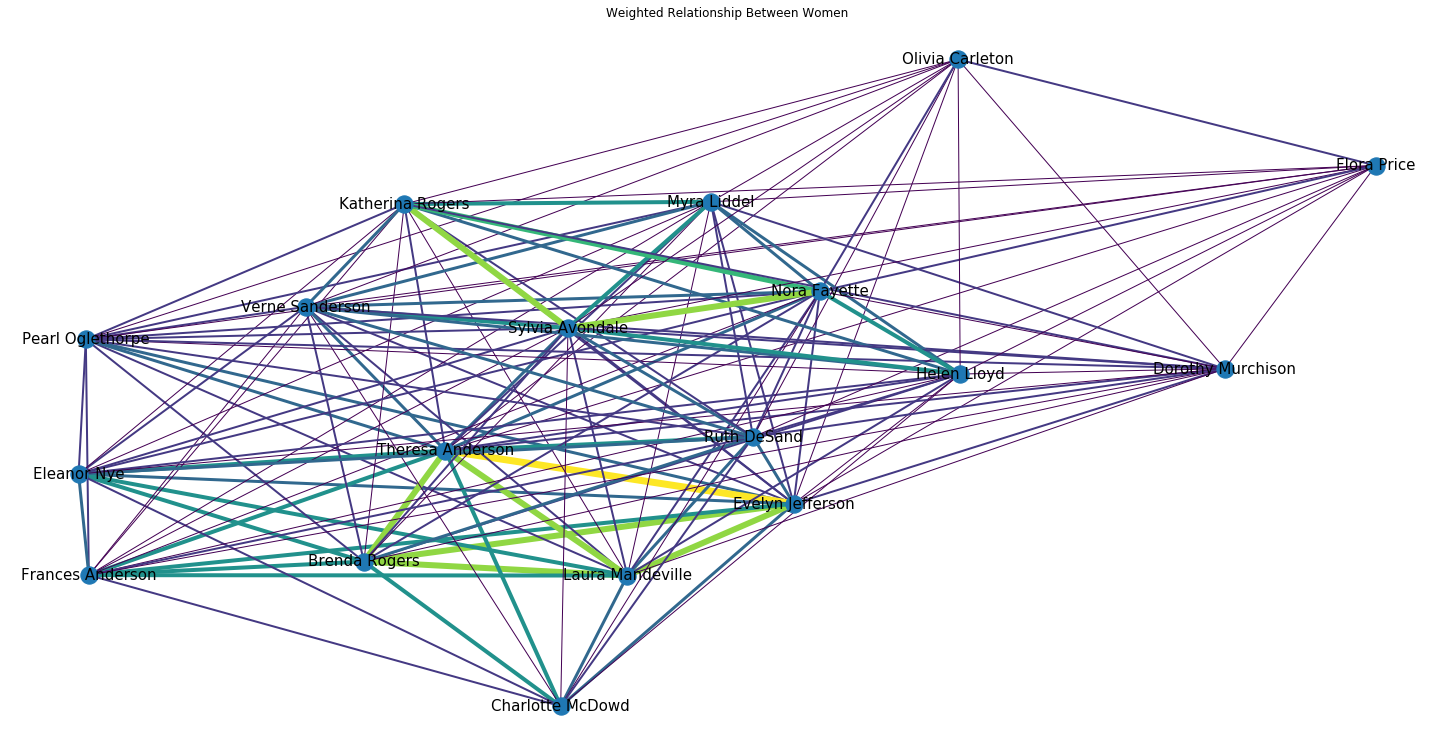

In [19]:
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in W_3.edges(data=True)]
nx.draw(W_3, width=weight, edge_color=weight, with_labels=True, font_size=15)
plt.axis("off")
plt.title("Weighted Relationship Between Women")
plt.show()

Based on this , we can see that the ticker lines and lighter lines (yellow and green) indicates that the connection between those women are higher. Let's apply the same to weighted events.

In [20]:
# following further instructions for weighted projection
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W_4 = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#Friend meetings, Clubs")
for w in clubs:
    print('%d %s' % (W_4.degree(w, weight='weight'), w))


#Friend meetings, Clubs
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


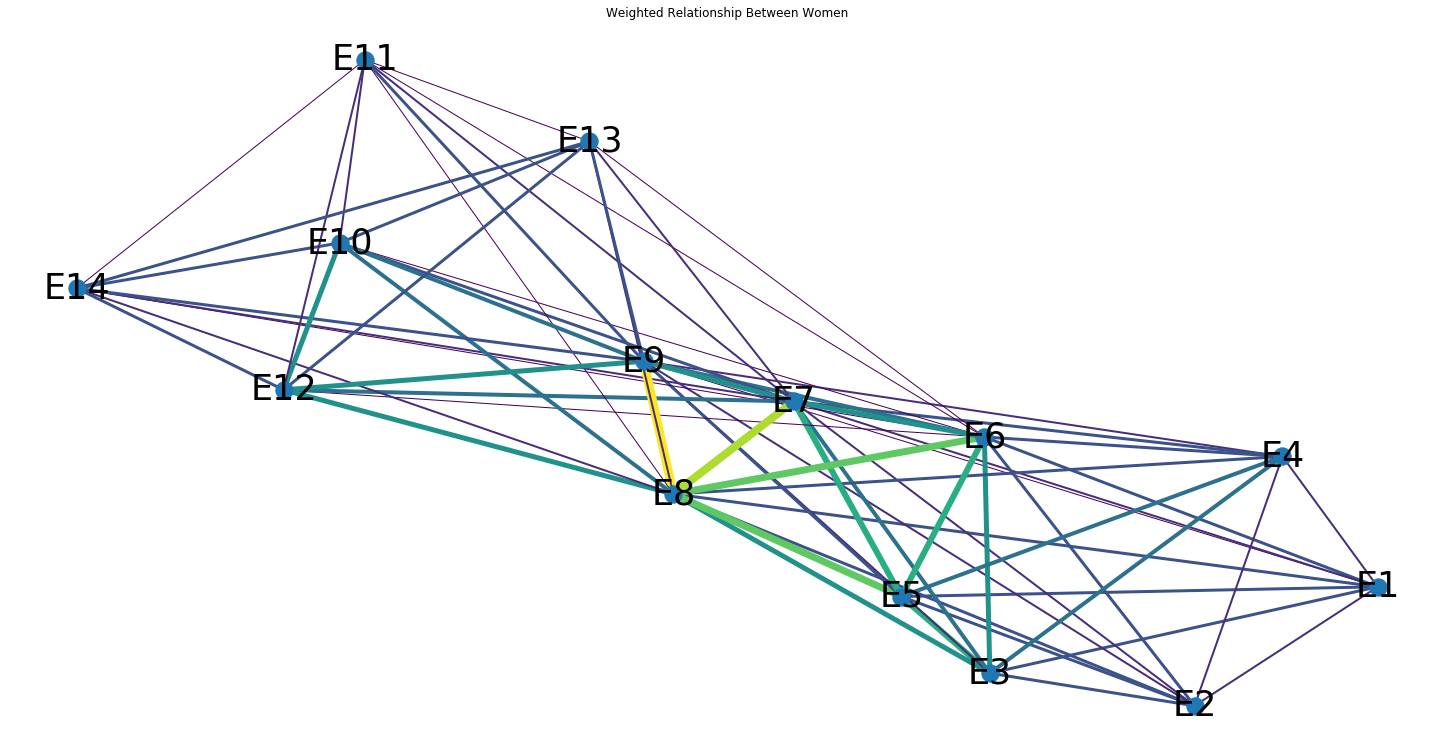

In [22]:
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in W_4.edges(data=True)]
nx.draw(W_4, width=weight, edge_color=weight, with_labels=True, font_size=35)
plt.axis("off")
plt.title("Weighted Relationship Between Women")
plt.show()

The above graphs shows us how strong each event is connected. (Yellow and Green line connections are the strongest). These club share more women as a member than the other clubs.

## Conclusion

The goal of the assignment was to find inference in the relationship between woman and social events. We can say that Evelyn Jefferson has belongs the most amount of clubs and she also has the most connection out of all the women. We can make an assumption that the more clubs a woman become a member the more connection she will have. In terms of clubs, E8 and E9 has the most number of members. 